# Problem Statement
Consider the attached dataset about *advertising and sales*. The attributes denote the investments on advertising in TV, radio etc and the target variable is the **total sales**. 

AIM: to predict the sales from the investments on advertising.

## 0. Prelimenary Work

### 0.1. Importing Libraries and Reading the Data

In [27]:
# Importing relevant libraries

import pandas as pd
import numpy as np

import random

from sklearn import linear_model as pLM
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso

In [28]:
# Reading the csv data
data = pd.read_csv("Advertising Dataset.csv")

In [29]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
print(data.describe())

       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [31]:
# rename the first column
data = data.rename(columns={"Unnamed: 0": "Sr. No."})

data.head()

,Sr. No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 1. Random division
Randomly divide the dataset into training (75%) and testing (25%) subsets [1 mark]

In [32]:
# shuffeling the data
sData = data.sample(frac=1)

train_size = int(.75 * len(data))  # --> 150

# splitting the data
train_set = sData[:train_size]
test_set = sData[train_size:]

In [33]:
train_set.head()

,Sr. No.,TV,radio,newspaper,sales
31,32,112.9,17.4,38.6,11.9
107,108,90.4,0.3,23.2,8.7
67,68,139.3,14.5,10.2,13.4
198,199,283.6,42.0,66.2,25.5
44,45,25.1,25.7,43.3,8.5


In [34]:
test_set.head()

,Sr. No.,TV,radio,newspaper,sales
160,161,172.5,18.1,30.7,14.4
18,19,69.2,20.5,18.3,11.3
125,126,87.2,11.8,25.9,10.6
139,140,184.9,43.9,1.7,20.7
57,58,136.2,19.2,16.6,13.2


In [35]:
# To check if any common value exists
for i in range(len(train_set)):
    for j in range(len(test_set)):
        if train_set.iloc[i, 0] == test_set.iloc[j, 0]:
            print("Common row found! ABORT")
            print(train_set.iloc[i, 0])
            print(test_set.iloc[j, 0])
            break

### 1.1. Attribute Matrix X

In [36]:
# Creating Attributes Matrix -- X

X_train = train_set.iloc[:, 1:4]
print(X_train.head())

X_test = test_set.iloc[:, 1:4]
print(X_test.head())

        TV  radio  newspaper
31   112.9   17.4       38.6
107   90.4    0.3       23.2
67   139.3   14.5       10.2
198  283.6   42.0       66.2
44    25.1   25.7       43.3
        TV  radio  newspaper
160  172.5   18.1       30.7
18    69.2   20.5       18.3
125   87.2   11.8       25.9
139  184.9   43.9        1.7
57   136.2   19.2       16.6


### 1.2. Label Vextor Y

In [37]:
# Creating Label Vector -- Y

Y_temp = train_set.iloc[:, 4]
Y_train = pd.DataFrame(Y_temp)
print(Y_train.head())

Y_temp = test_set.iloc[:, 4]
Y_test = pd.DataFrame(Y_temp)
print(Y_test.head())

     sales
31    11.9
107    8.7
67    13.4
198   25.5
44     8.5
     sales
160   14.4
18    11.3
125   10.6
139   20.7
57    13.2


## 2. Linear Regression 

Using Linear Regression, fit a model to predict the sales from investments using your own formula. Compare the coefficients as found by the python library function [3 marks]

### 2.1. Coefficient by Model From Scratch

In [71]:
class OrdinaryLeastSquared(object):
    
    def __init__(self):
        self.coefficients = []

    def _reshape_x(self, X):
        # Reshapig into a vector of 1 column
        return X.reshape(-1, 1)

    def _concatneate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
        return np.concatenate((ones, X), 1)

    # -- Heart of the model -- #
    def fit(self, X, y):
        if len(X.shape) == 1:
            X = self._reshape_x(X)
        
        X = self._concatneate_ones(X)

        self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(
            X.transpose().dot(y))
    
    def predict(self, entry):
        b0 = self.coefficients[0]
        other_betas = self.coefficients[1:]

        prediction = other_betas.transpose().dot(entry) + b0
        print (prediction)
        
        return prediction

In [72]:
model = OrdinaryLeastSquared()

model.fit(X_train, Y_train)
model.coefficients

array([[ 2.83491025],
       [ 0.04614785],
       [ 0.19036464],
       [-0.00312993]])

In [73]:
y_predictions = []

for row in X_train.values:
    print (row)
    y_predictions.append(model.predict(row)[0])

y_predictions = np.asarray(y_predictions)

[112.9  17.4  38.6]
[11.23653161]
[90.4  0.3 23.2]
[6.99117062]
[139.3  14.5  10.2]
[11.99166741]
[283.6  42.   66.2]
[23.71055323]
[25.1 25.7 43.3]
[8.75006644]
[94.2  4.9  8.1]
[8.08947178]
[93.9 43.5 50.5]
[15.29099346]
[292.9  28.3  43.2]
[21.60372107]
[230.1  37.8  69.2]
[20.4327221]
[182.6  46.2  58.7]
[19.87262663]
[68.4 44.5 35.6]
[14.35122399]
[163.3  31.6  52.9]
[16.220803]
[265.6  20.    0.3]
[18.89813242]
[ 0.7 39.6  8.7]
[10.37842316]
[ 7.8 38.9 50.6]
[10.44167344]
[104.6   5.7  34.4]
[8.63938388]
[73.4 17.  12.9]
[9.41798504]
[43.  25.9 20.5]
[9.68554831]
[74.7 49.4 45.7]
[15.54312986]
[11.7 36.9 45.2]
[10.2578224]
[44.7 25.8 20.6]
[9.74465019]
[188.4  18.1  25.6]
[14.89463847]
[76.4 26.7 22.3]
[11.37354425]
[266.9  43.8   5. ]
[23.47409242]
[210.7  29.5   9.3]
[18.1449103]
[ 8.7 48.9 75. ]
[12.31048257]
[171.3  39.7  37.7]
[18.17951436]
[17.2 45.9 69.3]
[12.14948596]
[110.7  40.6  63.2]
[15.47446969]
[286.   13.9   3.7]
[18.66768242]
[220.3  49.    3.2]
[22.31913274]
[13

In [74]:
# Actual vs Predicted DataFrame
AvP = Y_train.copy()
AvP["Y Predictions"] = y_predictions
print (Y_train)
AvP

     sales
31    11.9
107    8.7
67    13.4
198   25.5
44     8.5
..     ...
76     6.9
194   17.3
119    6.6
92    19.4
10     8.6

[150 rows x 1 columns]


,sales,Y Predictions
31,11.9,11.236532
107,8.7,6.991171
67,13.4,11.991667
198,25.5,23.710553
44,8.5,8.750066
...,...,...
76,6.9,4.343770
194,17.3,16.501445
119,6.6,6.706215
92,19.4,19.073846


### 2.2. Coefficients by Python Function


In [ ]:
betas_from_library = pLM.LinearRegression().fit(X_train, Y_train).coef_
beta_naught_from_library = pLM.LinearRegression().fit(X_train, Y_train).intercept_

print("B_0 from mmodel:", model.coefficients[0])
print("W from mmodel:", model.coefficients[1:])

print("--------------")

print("B_0 from sklearn Linear Regression: ", beta_naught_from_library)
print("W from sklearn Linear Regression: ", betas_from_library)

B_0 from mmodel: [3.22881573]
W from mmodel: [[ 0.04443152]
 [ 0.18685433]
 [-0.00481199]]
--------------
B_0 from sklearn Linear Regression:  [3.22881573]
W from sklearn Linear Regression:  [[ 0.04443152  0.18685433 -0.00481199]]


## 3. Mean Squared Error on Test Set
Compute the mean squared error on the testing set [1 marks]

### 3.1. Applying Model onn test set

In [ ]:
y_predictions_test = []

for row in X_test.values:
    y_predictions_test.append(model.predict(row)[0])

y_predictions_test = np.asarray(y_predictions_test)

In [ ]:
# Actual vs Predicted DataFrame
AvP_test = Y_test.copy()
AvP_test["Y Predictions"] = y_predictions_test

AvP_test

,sales,Y Predictions
156,15.3,15.286093
110,13.4,14.521781
61,24.2,22.554236
31,11.9,11.310657
106,7.2,6.252085
175,27.0,24.467939
167,12.2,13.295544
86,12.0,11.680443
93,22.2,20.848960
24,9.7,8.263204


In [ ]:
# Calculating the mean square error
mean_sq_error = []

for i in range(len(AvP_test)):
    mean_sq_error.append((AvP_test.iloc[i, 0] - AvP_test.iloc[i, 1])**2)

MSE_test = sum(mean_sq_error)
MSE_test /= len(AvP_test)
MSE_test

2.414960220148406

## 4. Ridge Regression

Using ridge regression with different values of lambda (0.5, 1, 5, 10, 50, 100) plot the coefficients against each other, and also compare the test set mean squared errors. [3 marks]

In [78]:
class RidgeRegression(object):


    def __init__(self):
        self.coefficients = []

    def _reshape_x(self, X):
        # Reshapig into a vector of 1 column
        return X.reshape(-1, 1)

    def _concatneate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
        return np.concatenate((ones, X), 1)

    def fit(self, X, y, alpha):
        if len(X.shape) == 1:
            X = self._reshape_x(X)
        
        X = self._concatneate_ones(X)

        I = np.identity(X.shape[1])

        self.coefficients = np.linalg.inv(
            X.transpose().dot(X) + alpha*I).dot(
                X.transpose().dot(y))
            
    def predict(self, entry):
        b = self.coefficients[0]
        other_betas = self.coefficients[1:]

        prediction = entry.dot(other_betas) + b
        return prediction

In [80]:
rrModel = RidgeRegression()

rrModel.fit(X_train, Y_train, alpha=2)

In [81]:
# prediction on test set
Y_Pred = rrModel.predict(X_test)
Y_Pred

,0
160,14.112940
18,9.760079
125,8.911897
139,19.716561
57,12.647473
65,7.615046
114,15.233297
7,11.983338
167,13.245318
190,12.364897


#### For Different Alphas

In [84]:
alpha = [0.5, 1, 5, 10, 50, 100]

mse_new = []

for i in alpha:
    rrModel.fit(X_train, Y_train, alpha=i)
    Y_Pred = rrModel.predict(X_test)    
    mse_new.append(np.square(np.subtract(Y_test, Y_Pred)).mean() / len(Y_Pred))

mse_new

[sales    0.042134
 dtype: float64,
 sales    0.042315
 dtype: float64,
 sales    0.04413
 dtype: float64,
 sales    0.046649
 dtype: float64,
 sales    0.059045
 dtype: float64,
 sales    0.064634
 dtype: float64]

### Mean Squared Error compared with Alpha

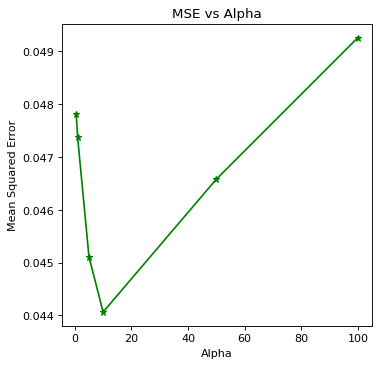

In [ ]:
plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title('MSE vs Alpha')
plt.ylabel('Mean Squared Error')
plt.xlabel('Alpha')
plt.plot(alpha,mse_new,marker='*',color='g')

In [85]:
alpha = [0.5, 1, 5, 10, 50, 100]

parameters = []
for i in alpha:
    rrModel.fit(X_train, Y_train, alpha=i)
    parameters.append(rrModel.coefficients)

# Coeff indices:
coeff_idx = []
for i in range(len(parameters[0])):
    coeff_idx.append(i)

In [86]:
parameters

[array([[ 2.77000499e+00],
        [ 4.63227346e-02],
        [ 1.91072954e-01],
        [-2.69442449e-03]]),
 array([[ 2.70800789e+00],
        [ 4.64897926e-02],
        [ 1.91749385e-01],
        [-2.27836815e-03]]),
 array([[2.29683534e+00],
        [4.75979579e-02],
        [1.96231157e-01],
        [4.82852677e-04]]),
 array([[1.9305693 ],
        [0.04858555],
        [0.2002142 ],
        [0.00294646]]),
 array([[0.84927708],
        [0.05150905],
        [0.21181086],
        [0.0102888 ]]),
 array([[0.50035666],
        [0.05246406],
        [0.21531553],
        [0.01275946]])]

### Comparing the coefficients with changing Alphas
Here, 
1. index 0 indicates the intercept term w0
2. index 1 indicates the w1 term, and so on

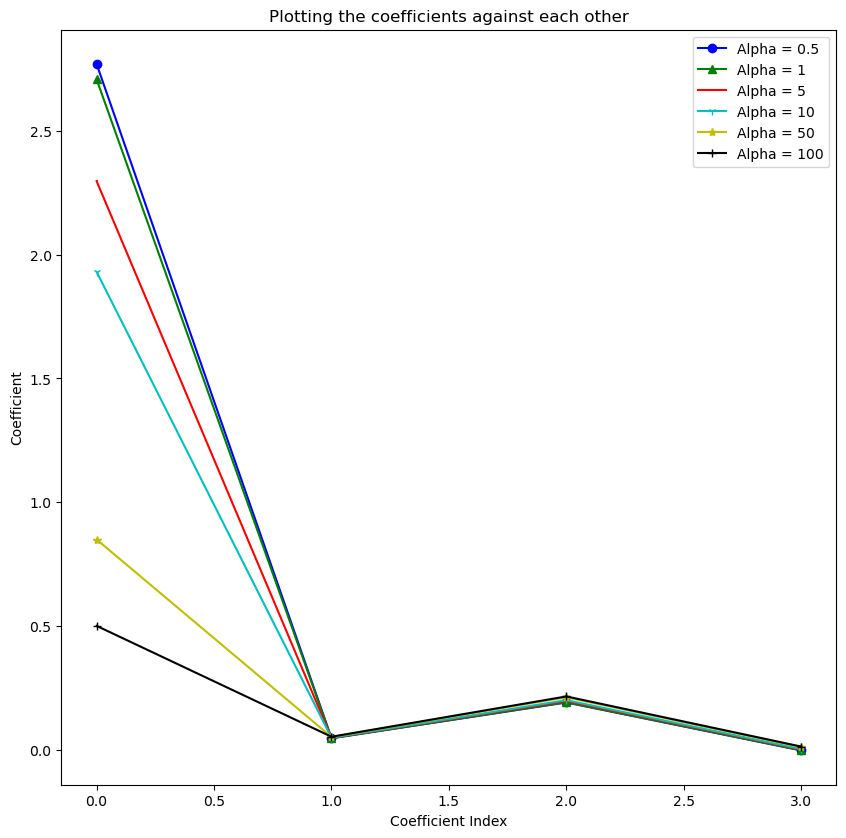

In [87]:
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.title('Plotting the coefficients against each other')
plt.ylabel('Coefficient')
plt.xlabel('Coefficient Index')
plt.plot(coeff_idx,parameters[0],marker='o',color='b' ,label='Alpha = 0.5')
plt.plot(coeff_idx,parameters[1],marker='^',color='g' ,label='Alpha = 1')
plt.plot(coeff_idx,parameters[2],marker=',',color='r' ,label='Alpha = 5')
plt.plot(coeff_idx,parameters[3],marker='1',color='c' ,label='Alpha = 10')
plt.plot(coeff_idx,parameters[4],marker='*',color='y' ,label='Alpha = 50')
plt.plot(coeff_idx,parameters[5],marker='+',color='k' ,label='Alpha = 100')
plt.legend()

In [91]:
# Comparing the coefficients (and NOT the bias term)

mean_list = []
print (len(parameters))
print (len(parameters[0]))
for i in range(1, len(parameters[0])):
    sum = 0
    for j in range(len(parameters)):
        sum += parameters[j][i]
    
    sum /= len(parameters)
    mean_list.append(sum)
print (mean_list)
print (np.argmax(mean_list))
maxPar = 'Parameter' + str(np.argmax(mean_list) + 1)
print(maxPar)

# variation of parameter 2 with alpha
parMean = []
for i in range(len(parameters)):
    parMean.append(parameters[i][np.argmax(mean_list)])

max_list = []
for i in range(len(parameters)):
    for j in range(1, len(parameters[0])-1):
        max = parameters[i][j]
        temp = parameters[i][j+1]
        if (temp > max):
            max = temp
    max_list.append(max)
print (max_list)

6
4
[array([0.04882819]), array([0.20106568]), array([0.00358413])]
1
Parameter2
[array([0.19107295]), array([0.19174938]), array([0.19623116]), array([0.2002142]), array([0.21181086]), array([0.21531553])]


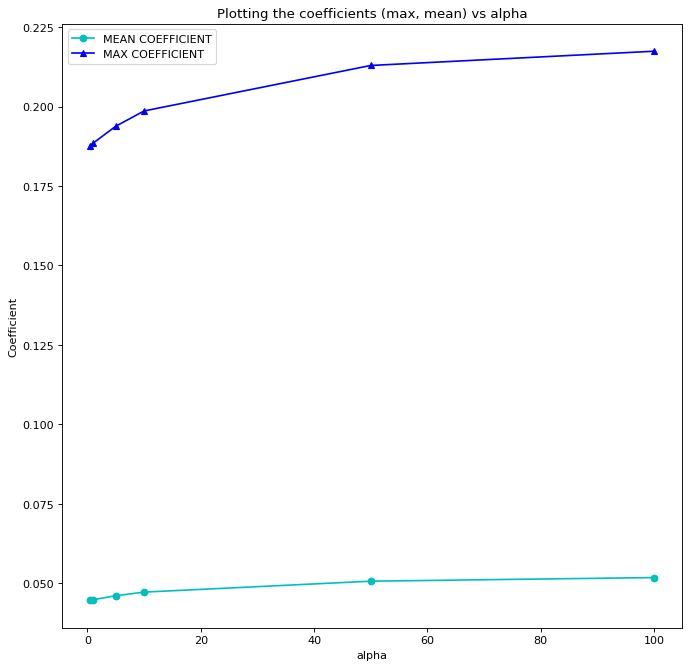

In [ ]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Plotting the coefficients (max, mean) vs alpha')
plt.ylabel('Coefficient')
plt.xlabel('alpha')
plt.plot(alpha,parMean,marker='o',color='c' ,label='MEAN COEFFICIENT')
plt.plot(alpha,max_list,marker='^',color='b' ,label='MAX COEFFICIENT')
plt.legend()

## 5. Lasso Regression

Use the library function of "LASSO regression" to find out which of the 3 features is most important, i.e. whose coefficient is furthest from 0. [2 marks]

In [ ]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,Y_train)

print('All the available coefficients obtained using Lasso regression are:')
print(lasso.coef_)
print('farthest from zero coefficient identified is = ', lasso.coef_.max())

print('----------------------------------------------------------------------')
print('Since, LASSO REGRESSION coeficient of feature #' + 
      str(np.where(lasso.coef_ == lasso.coef_.max())[0] + 1) + 
      ' i.e. ' + 
      str(X_train.columns[int(
          np.where(lasso.coef_ == lasso.coef_.max())[0])]) + 
      ' is the farthest', '\n', 'from 0 which means that ' + 
      str(X_train.columns[int(
          np.where(lasso.coef_ == lasso.coef_.max())[0])]) + 
      ' is the most important feature!')

All the available coefficients obtained using Lasso regression are:
[ 0.04441851  0.18618922 -0.00443115]
farthest from zero coefficient identified is =  0.1861892181617704
----------------------------------------------------------------------
Since, LASSO REGRESSION coeficient of feature #[2] i.e. radio is the farthest 
 from 0 which means that radio is the most important feature!
